In [2]:

import pandas as pd
import numpy as np


In [3]:
import tensorflow as tf
from tensorflow import keras


In [15]:
df=pd.read_csv("./Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6896,6897,15649086,Patterson,596,France,Male,42,7,0.00,2,1,1,121568.37,0
2952,2953,15654901,Horton,733,France,Male,51,10,141556.96,1,1,0,130189.53,0
7272,7273,15666166,Pettry,653,France,Female,74,0,121276.32,1,1,1,160348.31,0
5382,5383,15589296,Brown,724,France,Female,40,6,110054.45,1,1,1,86950.72,0
6078,6079,15730657,Ibekwe,548,France,Female,41,4,82596.80,1,0,1,55672.09,0


In [5]:
df.shape

(10000, 14)

In [16]:
df.drop(['RowNumber','CustomerId','Surname'],axis="columns",inplace=True)

In [33]:
df.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:

def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='Object':
                print(f'{column}: {df[column].unique()}') 

In [28]:
print_unique_col_values(df)

In [17]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

C:\Users\vishe\AppData\Local\Temp\ipykernel_10368\1936331591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':0,'Male':1},inplace=True)
C:\Users\vishe\AppData\Local\Temp\ipykernel_10368\1936331591.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].repl

In [18]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [19]:
df=pd.get_dummies(data=df,columns=['Geography']).astype('int64')

In [20]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5736,581,1,31,3,0,2,0,0,89040,0,1,0,0
7187,552,0,38,9,134105,1,0,0,57850,0,1,0,0
4070,676,1,48,1,131659,2,0,1,14152,0,0,0,1
400,605,1,52,1,63349,1,1,0,108887,0,1,0,0
1454,521,0,34,7,70731,1,1,1,20243,1,0,0,1


In [29]:
cols_to_scale=['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [30]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9642,0.708,1,0.270270,0.6,0.425221,0.000000,1,0,0.868908,0,0,0,1
970,0.576,0,0.405405,1.0,0.551352,0.000000,1,1,0.238363,0,1,0,0
772,0.478,1,0.189189,0.2,0.000000,0.333333,0,1,0.047289,0,1,0,0
4554,0.484,1,0.283784,0.7,0.000000,0.333333,1,0,0.415404,0,1,0,0
6530,0.322,0,0.770270,0.9,0.420924,0.000000,0,1,0.527120,0,0,1,0


In [31]:
X=df.drop(['Exited'],axis="columns")
y=df['Exited']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [37]:
model=keras.Sequential([
    keras.layers.Dense(100,activation='tanh',input_shape=(12,)),
    keras.layers.Dense(120,activation='tanh'),
    keras.layers.Dense(130,activation='tanh'),
    keras.layers.Dense(50,activation='tanh'),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7998 - loss: 0.4698
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8314 - loss: 0.4152
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3752
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.3708
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3509
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8511 - loss: 0.3558
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3333
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3415
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3470
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.3304
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3298
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [38]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8101 - loss: 0.7172


[0.7463496327400208, 0.8105000257492065]

In [39]:
yp=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1595
           1       0.54      0.48      0.51       405

    accuracy                           0.81      2000
   macro avg       0.70      0.69      0.70      2000
weighted avg       0.80      0.81      0.81      2000



Text(95.72222222222221, 0.5, 'Truth')

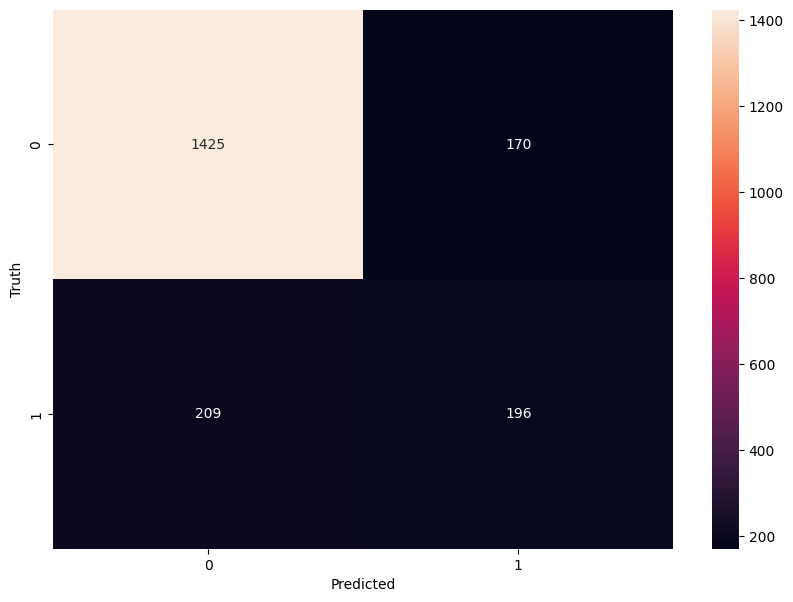

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')